# QuickGuide for Image analysis
[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

In [ ]:
!pip install -U pandas openpyxl tqdm
!pip install -U requests selenium beautifulsoup4 PyMuPDF
!pip install -U wordcloud nltk 
!pip install -U scikit-learn openai 
!pip install -U matplotlib seaborn
!pip install -U opencv-python pytube 
!pip install -U mkt-retv

## Env 세팅

In [1]:
from market_research.analysis import ImgAnalysis

## 준비

### 분석 폴더
- `input`에 파일을 넣어주세요.

In [2]:
ima = ImgAnalysis()

## Video 분석

#### 비디오 다운로드 from yt

In [3]:
ima.preset_video_dict

{'elemental': 'https://www.youtube.com/watch?v=hXzcyx9V0xw',
 'supermario': 'https://www.youtube.com/watch?v=RjNcTBXTk4I',
 'spideman1_1': 'https://www.youtube.com/watch?v=g4Hbz2jLxvQ',
 'spideman1_2': 'https://www.youtube.com/watch?v=tg52up16eq0',
 'spideman2_1': 'https://www.youtube.com/watch?v=cqGjhVJWtEg&t=74s',
 'spideman2_2': 'https://www.youtube.com/watch?v=shW9i6k8cB0',
 'arcane1': 'https://www.youtube.com/watch?v=fXmAurh012s',
 'arcane2': 'https://www.youtube.com/watch?v=xISkcHi7djw'}

In [4]:
url_list = []
url_list.extend(list(ima.preset_video_dict.values()))

In [5]:
for url in url_list:
    video_path= ima.download_video_from_yt(url)

#### video Frame 분석

In [6]:
video_paths = ima.read_files_from_inputpath(docs_type='video')
video_paths

[WindowsPath('input/Arcane  Official Trailer  Netflix.mp4'),
 WindowsPath('input/Arcane Season 2  SEASON 2 PROMO TRAILER  Netflix  arcane season 2 trailer.mp4'),
 WindowsPath('input/Elemental  Official Trailer.mp4'),
 WindowsPath('input/SPIDER-MAN ACROSS THE SPIDER-VERSE - Official Trailer (HD).mp4'),
 WindowsPath('input/SPIDER-MAN ACROSS THE SPIDER-VERSE - Official Trailer 2 (HD).mp4'),
 WindowsPath('input/SPIDER-MAN INTO THE SPIDER-VERSE - Official Trailer (HD).mp4'),
 WindowsPath('input/SPIDER-MAN INTO THE SPIDER-VERSE - Official Trailer 2 (HD).mp4'),
 WindowsPath('input/The Super Mario Bros Movie  Final Trailer.mp4')]

In [ ]:
for video_path in video_paths:
    ima.process_video(video_path, frame_interval=60, showmode=False)

Arcane__Official_Trailer__Netflix
Arcane_Season_2__SEASON_2_PROMO_TRAILER__Netflix__arcane_season_2_trailer


## Image 분석

In [25]:
image_list = ima.read_files_from_inputpath()
image_list.sort()

  0%|                                                                                                                                           | 0/62 [00:00<?, ?it/s]

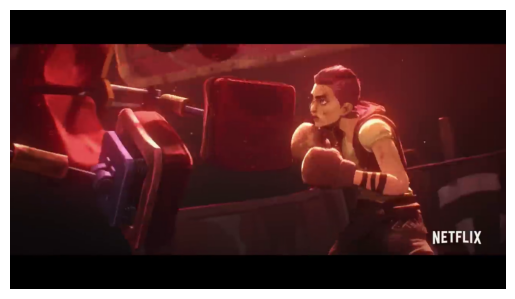

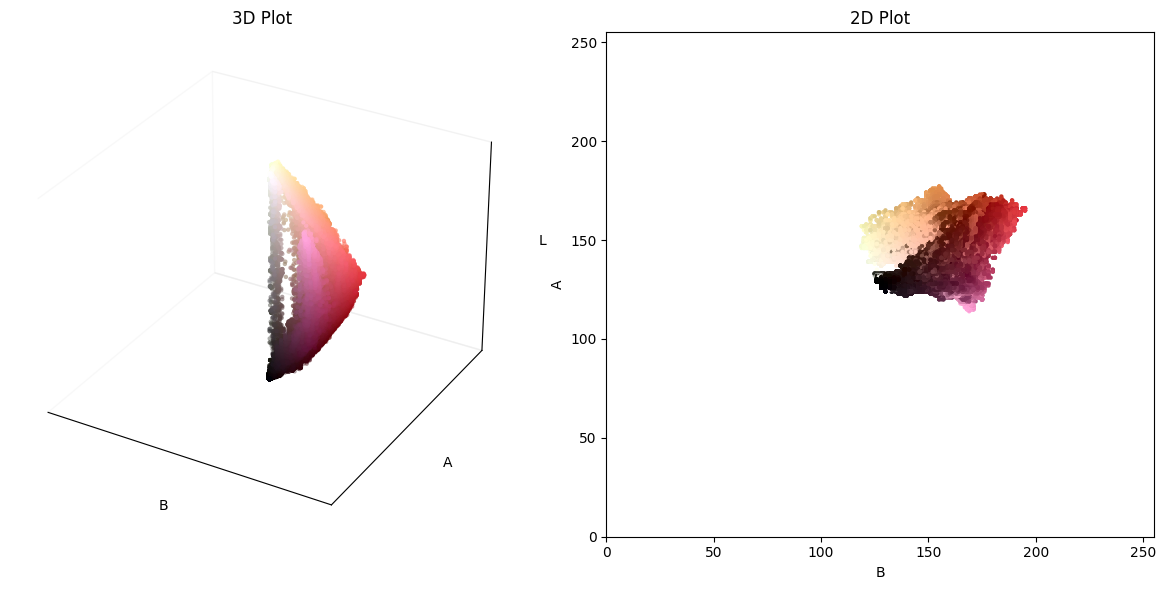

  2%|██                                                                                                                               | 1/62 [01:11<1:12:43, 71.53s/it]

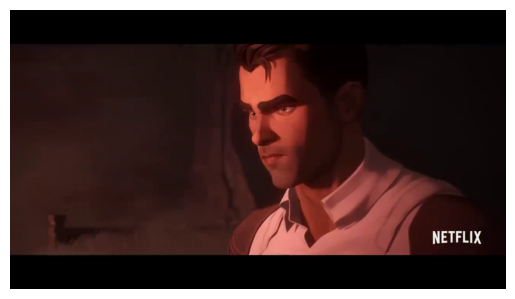

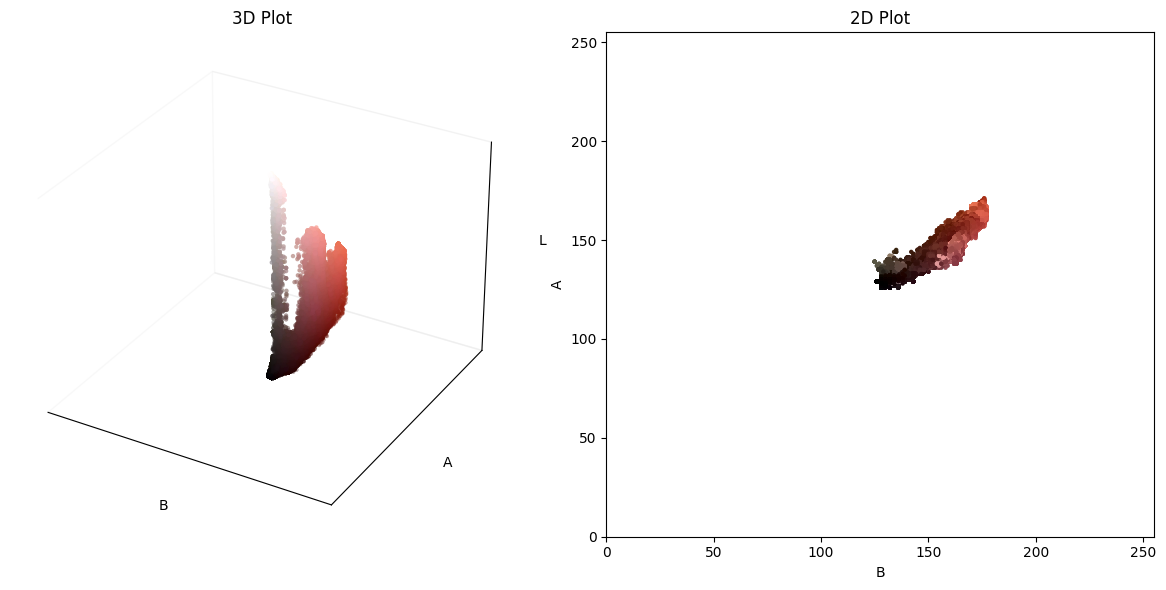

  3%|████▏                                                                                                                              | 2/62 [01:44<48:45, 48.76s/it]

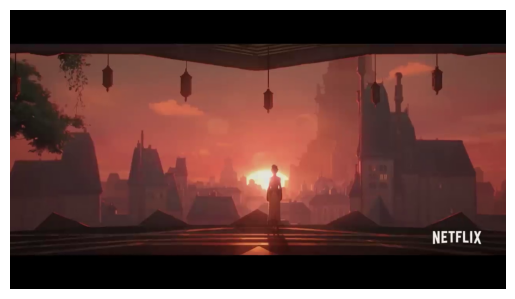

In [ ]:
ima.to_lab_images(image_list, showmode=True)

## colab에서 파일 받기

In [ ]:
from google.colab import files

!zip -r /content/input.zip /content/input
!zip -r /content/results.zip /content/results

files.download('/content/input.zip')
files.download('/content/results.zip')

---